# Master Python Notebook

## Common Settings and Imports

In [2]:
# Common Settings for All Notebooks

# Imports from __future__ in case we're running Python 2
from __future__ import division, print_function
from __future__ import absolute_import, unicode_literals

# Our numerical workhorses
import numpy as np
import pandas as pd
import scipy.integrate

# Import pyplot for plotting
import matplotlib.pyplot as plt

# Seaborn, useful for graphics
import seaborn as sns

# Import Bokeh modules for interactive plotting
import bokeh.io
import bokeh.mpl
import bokeh.plotting

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables SVG graphics inline.  There is a bug, so uncomment if it works.
# %config InlineBackend.figure_formats = {'svg',}

# This enables high resolution PNGs. SVG is preferred, but has problems
# rendering vertical and horizontal lines
%config InlineBackend.figure_formats = {'png', 'retina'}

# Set up Bokeh for inline viewing
bokeh.io.output_notebook()

ImportError: No module named 'pandas'

To generate a floating table of contents, use this code:

```jupyter nbextension install --user https://rawgithub.com/minrk/ipython_extensions/master/nbextensions/toc.js
curl -L https://rawgithub.com/minrk/ipython_extensions/master/nbextensions/toc.css > $(jupyter --data-dir)/nbextensions/toc.css
jupyter nbextension enable toc```

This is from this website: https://github.com/minrk/ipython_extensions


## Pandas

In [ ]:
# create a test dataframe
df_test=pd.DataFrame(np.random.randn(6,5), index=list('123456'),columns=list('ABCDE'))
df_test    

In [ ]:
# to list the data type, use .dtypes:
df_test.dtypes

In [ ]:
# to view the top or bottom, use .head() or .tail():
df_test.head(2)    

In [ ]:
# list the index   
df_test.index    

In [ ]:
# list the values only
df_test.values

In [ ]:
# use .describe() to generate stats about the dataframe, by column
df_test.describe()

In [ ]:
# use .melt() to reshape the table in to label:value pairs:
df_test_melt=pd.melt(df_test)
df_test_melt

In [ ]:
# you can also create dataframes in a column format
df = pd.DataFrame({
   'col1': ['Item0', 'Item0', 'Item1', 'Item1'],
   'col2': ['Gold', 'Bronze', 'Gold', 'Silver'],
   'col3': [1, 2, np.nan, 4]
})
df

In [ ]:
# you can also create dataframes in a row format
df = pd.DataFrame(columns=['a','b','c','d'], index=['x','y','z'])
df.loc['y'] = pd.Series({'a':1, 'b':5, 'c':2, 'd':3})
df.loc['x'] = pd.Series({'a':0, 'c':3, 'd':0})
df.loc['x'] = pd.Series({'a':8})
df

### Pivot Tables

In [ ]:
from pivottablejs import pivot_ui

pivot_ui(df_test_melt)

### Permutations

In [ ]:
from itertools import product

variable_list1 = ["East", "West"]
variable_list2 = ["SWL", "None"]
variable_list3 = ["37t", "2t", "Unloaded", "TMRT", "RCMRT"]

all_permutations = list(product(variable_list1, variable_list2, variable_list3))

# use panda dataframe to print 2D as a table for more readable format
my_df=pd.DataFrame(all_permutations)
print(my_df)
print(my_df[2][1])
print(" --- ")
# print the total number of permnutations
print(str(len(all_permutations)) + " permutations")

#this method prints the output to the screen as a comma separated
for i in range(len(all_permutations)):
    print(all_permutations[i][0] + ',' + all_permutations[i][1] + ',' + all_permutations[i][2])

## LATEX and Markdown
Use single dollar sign for inline LATEX and double dollar sign for block LATEX. For example, this $c = \sqrt{a^2 + b^2}$ is inline.
And this is block:
$$a^2 + b^2 = c^2$$

$$v(t) = v_0 + \frac{1}{2}at^2$$

$$\gamma = \frac{1}{\sqrt{1 - v^2/c^2}}$$

$$\exists x \forall y (Rxy \equiv Ryx)$$

$$p \wedge q \models p$$

$$\Box\diamond p\equiv\diamond p$$

$$\int_{0}^{1} x dx = \left[ \frac{1}{2}x^2 \right]_{0}^{1} = \frac{1}{2}$$

$$e^x = \sum_{n=0}^\infty \frac{x^n}{n!} = \lim_{n\rightarrow\infty} (1+x/n)^n$$

Other Markdown things are bulleted lists:
* item 1
* other items


## Plotting

In [ ]:
# Generate data to plot
x = np.linspace(0, 2 * np.pi, 200)
y = np.exp(np.sin(np.sin(x)))

# Make plot
plt.plot(x, y)
plt.xlim((0, 2 * np.pi))
plt.xlabel(r'$x$')
plt.ylabel(r'$\mathrm{e}^{\sin{x}}$')

In [ ]:
# Generate data to plot
x = np.linspace(0, 2 * np.pi, 200)
y = np.exp(np.sin(np.sin(x)))

# Make plot
plt.plot(x, y)
plt.xlim((0, 2 * np.pi))
plt.xlabel('x')
plt.ylabel('exp(sin(x))')

# Make it interactive with Bokeh
bokeh.plotting.show(bokeh.mpl.to_bokeh())

In [ ]:
def lorenz_attractor(r, t, p):
    """
    Compute the right hand side of system of ODEs for Lorenz attractor.
    
    Parameters
    ----------
    r : array_like, shape (3,)
        (x, y, z) position of trajectory.
    t : dummy_argument
        Dummy argument, necessary to pass function into 
        scipy.integrate.odeint
    p : array_like, shape (3,)
        Parameters (s, k, b) for the attractor.
        
    Returns
    -------
    output : ndarray, shape (3,)
        Time derivatives of Lorenz attractor.
        
    Notes
    -----
    .. Returns the right hand side of the system of ODEs describing
       the Lorenz attractor.
        x' = s * (y - x)
        y' = x * (k - z) - y
        z' = x * y - b * z
    """
    # Unpack variables and parameters
    x, y, z = r
    s, p, b = p
    
    return np.array([s * (y - x), 
                     x * (p - z) - y, 
                     x * y - b * z])

In [ ]:
# Parameters to use
p = np.array([10.0, 28.0, 8.0 / 3.0])

# Initial condition
r0 = np.array([0.1, 20.0, 0.0])

# Time points to sample
t = np.linspace(0.0, 80.0, 10000)

# Use scipy.integrate.odeint to integrate Lorentz attractor
r = scipy.integrate.odeint(lorenz_attractor, r0, t, args=(p,))

# Unpack results into x, y, z.
x, y, z = r.transpose()

# Plot the result
plt.plot(x, z, '-', linewidth=0.5)
plt.xlabel(r'$x(t)$', fontsize=18)
plt.ylabel(r'$z(t)$', fontsize=18)
plt.title(r'$x$-$z$ proj. of Lorenz attractor traj.')

## XLWINGS
**This is an area I need to look at in more deteail**


## General Python

### Multiple Find and Replace

In [ ]:
f = open("IFEM2_geom_for_Navisworks.stp",'r')
filedata = f.read()
f.close()

newdata=filedata

newdata=newdata.replace("\'renameme.1\'","\'node135\'")
newdata=newdata.replace("\'renameme.2\'","\'node136\'")
newdata=newdata.replace("\'renameme.3\'","\'node137\'")
newdata=newdata.replace("\'renameme.4\'","\'node138\'")
newdata=newdata.replace("\'renameme.5\'","\'node139\'")
newdata=newdata.replace("\'renameme.6\'","\'node140\'")
newdata=newdata.replace("\'renameme.7\'","\'node142\'")
newdata=newdata.replace("\'renameme.8\'","\'node144\'")
newdata=newdata.replace("\'renameme.9\'","\'node147\'")
#repeat as many times as necessary...

f = open("IFEM2_geom_for_Navisworks2.stp",'w')
f.write(newdata)
f.close()

### Sets

In [28]:
# Sets are lists with no duplicate entries.
# Sets are a powerful tool in Python since they have the ability to calculate differences and intersections between other sets.

my_set= set("my name is Eric and Eric is my name".split())
print(my_set)

# use .intersection, .symmetric_difference, .difference and .union to compare two sets quickly. For example:
a = set(["Jake", "John", "Eric"])
b = set(["John", "Jill"])
a.intersection(b) #who is in both sets

{'is', 'and', 'my', 'name', 'Eric'}


{'John'}

### List All Files and Folders in a Directory

In [ ]:
%%bash --out output
# Line above: Run bash, with the output being a python variable called 'output'

# Change the working directory to the current directory
cd "$(dirname "$0")"

# For all filenames, print the filename, then end
for f in *; do echo "$f"; done


In [ ]:
print(output)

## Databases

In [ ]:
import mysql.connector

config = {
  'user': 'root',
  'password': 'root',
  'host': 'localhost:8889',
  'database': 'inventory',
  'raise_on_warnings': True,
}

link = mysql.connector.connect(**config)

## Idioms

In [ ]:
# Use tuples to swap values! In python, you do not need to create temp value when swapping variable values. 
# They can be done in one line by using tuples

old="hello"
new="world"

# bad
#temp = old
#old = new
#new = temp

# good
old, new = new, old
print(old,new)

In [ ]:
# Don't use indices when looping. In python, you do not need to keep track of indices when looping.
states = ["texas", "california", "ohio", "florida"]

"""
# bad
i = 0
while i < len(states):
    print(states[i])
    i += 1
"""

# good
for state in states:
    print(state)

In [ ]:
# Use 'join' to join strings together. Strings have a built-in function called 'join' that can be used to concatenate them.
sample = ['my', 'name', 'is']

"""
#bad
sample[0] + ' ' + sample[1] + ' ' + sample[2]
"""

# good
' '.join(sample)


In [ ]:
# 0 is False and everything else is True. Any string, list, array or dict with length > 0 is True. 
sample = ['mom', 'dad']
stri = "hi"
count = 0

"""
# Bad

if len(sample)>1:
    print('hi')

if len(stri)>1:
    print('hello')
    
if count == 0:
    print('nothing')

"""

# good

if sample:
    print('hi')

if stri:
    print('hi')

if not count:
    print('nothing')


In [ ]:
# Use 'format' for string formatting. It's easier to read and less prone to error.
character = 'Neo'
movie = 'Matrix'
actor = 'Keanu'

"""
#bad

print('%s played %s in %s.' % (actor, character, movie))

"""

# good

print('{actor} played {character} in {movie}'.format(actor=actor,
                                                    character=character,
                                                    movie=movie))


In [ ]:
# Use list comprehensions to generate a list. Most of the times, they are easier to read and require fewer words.
states = ["texas", "california", "ohio", "florida"]

"""
# bad

new = []
for state in states:
    if 'a' in state:
        new.append(state)

"""

# good

new = [state for state in states if 'a' in state]

print (new)


## Vibration Data Processing

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.fftpack import fft
from scipy import signal
import tkinter as tk
from tkinter import filedialog

file_path = "C:/Users/Stevens/Google Drive/Work/Nick/Software - Engineering/Python, Tensorflow, Machine Learning/vibration-data-examples-CSV/aircraft_takeoff.csv"

#Load Data (assumes two column array
df = pd.read_csv(file_path,delimiter=',',header=None,names=["time","data"])
t = df["time"]
x = df["data"]

#Determine variables
N = np.int(np.prod(t.shape))#length of the array
N2 = 2**(N.bit_length()-1) #last power of 2
Fs = 1/(t[1]-t[0])  #sample rate (Hz)
T = 1/Fs;
print("# Samples:",N)
print("Next power of 2:",N2)

OSError: File b'C:/Users/Stevens/Google Drive/Work/Nick/Software - Engineering/Python, Tensorflow, Machine Learning/vibration-data-examples-CSV/aircraft_takeoff.csv' does not exist

In [7]:
#Plot Data
plt.figure(1)
plt.plot(t, x)
plt.xlabel('Time (seconds)')
plt.ylabel('Accel (g)')
plt.title(file_path)
plt.grid()
plt.show()

NameError: name 't' is not defined

In [ ]:
#Compute RMS and Plot
w = np.int(np.floor(Fs)); #width of the window for computing RMS
steps = np.int_(np.floor(N/w)); #Number of steps for RMS
t_RMS = np.zeros((steps,1)); #Create array for RMS time values
x_RMS = np.zeros((steps,1)); #Create array for RMS values
for i in range (0, steps):
    t_RMS[i] = np.mean(t[(i*w):((i+1)*w)]);
    x_RMS[i] = np.sqrt(np.mean(x[(i*w):((i+1)*w)]**2));
plt.figure(2)
plt.plot(t_RMS, x_RMS)
plt.xlabel('Time (seconds)')
plt.ylabel('RMS Accel (g)')
plt.title('RMS - ' + file_path)
plt.grid()
plt.show()

In [ ]:
#Compute and Plot FFT
plt.figure(3)
N = N2 #truncate array to the last power of 2
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
yf = fft(x, n = N)
plt.plot(xf, 2.0/N * np.abs(yf[0:np.int(N/2)]))
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Accel (g)')
plt.title('FFT - ' + file_path)
bokeh.plotting.show(bokeh.mpl.to_bokeh())
# plt.show()

In [ ]:
# Compute and Plot Spectrogram
plt.figure(4)
f, t2, Sxx = signal.spectrogram(x, Fs, nperseg = Fs/4)
plt.pcolormesh(t2, f, np.log(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram - ' + file_path)
plt.show()

## Statistics

if we want to plot the 95% confidence interval for the mean of our data samples, we can use the bootstrap to do so. The basic idea is simple - draw many, many samples with replacement from the data available, estimate the mean from each sample, then rank order the means to estimate the 2.5 and 97.5 percentile values for 95% confidence interval. Unlike using normal assumptions to calculate 95% CI, the results generated by the bootstrap are robust even if the underlying data are very far from normal.

In [ ]:
import numpy as np
import numpy.random as npr
import pylab

def bootstrap(data, num_samples, statistic, alpha):
    """Returns bootstrap estimate of 100.0*(1-alpha) CI for statistic."""
    n = len(data)
    idx = npr.randint(0, n, (num_samples, n))
    samples = data[idx]
    stat = np.sort(statistic(samples, 1))
    return (stat[int((alpha/2.0)*num_samples)],
            stat[int((1-alpha/2.0)*num_samples)])

if __name__ == '__main__':
    # data of interest is bimodal and obviously not normal
    x = np.concatenate([npr.normal(3, 1, 100), npr.normal(6, 2, 200)])

    # find mean 95% CI and 100,000 bootstrap samples
    low, high = bootstrap(x, 100000, np.mean, 0.05)

    # make plots
    pylab.figure(figsize=(8,4))
    pylab.subplot(121)
    pylab.hist(x, 50, histtype='step')
    pylab.title('Historgram of data')
    pylab.subplot(122)
    pylab.plot([-0.03,0.03], [np.mean(x), np.mean(x)], 'r', linewidth=2)
    pylab.scatter(0.1*(npr.random(len(x))-0.5), x)
    pylab.plot([0.19,0.21], [low, low], 'r', linewidth=2)
    pylab.plot([0.19,0.21], [high, high], 'r', linewidth=2)
    pylab.plot([0.2,0.2], [low, high], 'r', linewidth=2)
    pylab.xlim([-0.2, 0.3])
    pylab.title('Bootstrap 95% CI for mean')
#   pylab.savefig('examples/boostrap.png')

Note that the bootstrap function is a higher order function, and will return the boostrap CI for any valid statistical function, not just the mean. For example, to find the 95% CI for the standard deviation, we only need to change np.mean to np.std in the arguments:

In [ ]:
# find standard deviation 95% CI bootstrap samples
low, high =  bootstrap(x, 100000, np.std, 0.05)

# make plots
pylab.figure(figsize=(8,4))
pylab.subplot(121)
pylab.hist(x, 50, histtype='step')
pylab.title('Historgram of data')
pylab.subplot(122)
pylab.plot([-0.03,0.03], [np.std(x), np.std(x)], 'r', linewidth=2)
pylab.scatter(0.1*(npr.random(len(x))-0.5), x)
pylab.plot([0.19,0.21], [low, low], 'r', linewidth=2)
pylab.plot([0.19,0.21], [high, high], 'r', linewidth=2)
pylab.plot([0.2,0.2], [low, high], 'r', linewidth=2)
pylab.xlim([-0.2, 0.3])
pylab.title('Bootstrap 95% CI for std')

In [ ]:
x=np.array([462.0,466.0,476.0])
# find mean 95% CI and 100,000 bootstrap samples
low, high = bootstrap(x, 100000, np.mean, 0.05)

# make plots
pylab.figure(figsize=(8,4))
pylab.subplot(121)
pylab.hist(x, 50, histtype='step')
pylab.title('Historgram of data')
pylab.subplot(122)
pylab.plot([-0.03,0.03], [np.mean(x), np.mean(x)], 'r', linewidth=2)
pylab.scatter(0.1*(npr.random(len(x))-0.5), x)
pylab.plot([0.19,0.21], [low, low], 'r', linewidth=2)
pylab.plot([0.19,0.21], [high, high], 'r', linewidth=2)
pylab.plot([0.2,0.2], [low, high], 'r', linewidth=2)
pylab.xlim([-0.2, 0.3])
pylab.title('Bootstrap 95% CI for mean')

In [ ]:
# find standard deviation 95% CI bootstrap samples
low, high =  bootstrap(x, 100000, np.std, 0.05)

# make plots
pylab.figure(figsize=(8,4))
pylab.subplot(121)
pylab.hist(x, 50, histtype='step')
pylab.title('Historgram of data')
pylab.subplot(122)
pylab.plot([-0.03,0.03], [np.std(x), np.std(x)], 'r', linewidth=2)
pylab.scatter(0.1*(npr.random(len(x))-0.5), x)
pylab.plot([0.19,0.21], [low, low], 'r', linewidth=2)
pylab.plot([0.19,0.21], [high, high], 'r', linewidth=2)
pylab.plot([0.2,0.2], [low, high], 'r', linewidth=2)
pylab.xlim([-0.2, 0.3])
pylab.title('Bootstrap 95% CI for std')

Permutation-resampling is another form of simulation-based statistical calculation, and is often used to evaluate the p-value for the difference between two groups, under the null hypothesis that the groups are invariant under label permutation. For example, in a case-control study, it can be used to find the p-value that hypothesis that the mean of the case group is different from that of the control group, and we cannot use the t-test because the distributions are highly skewed.

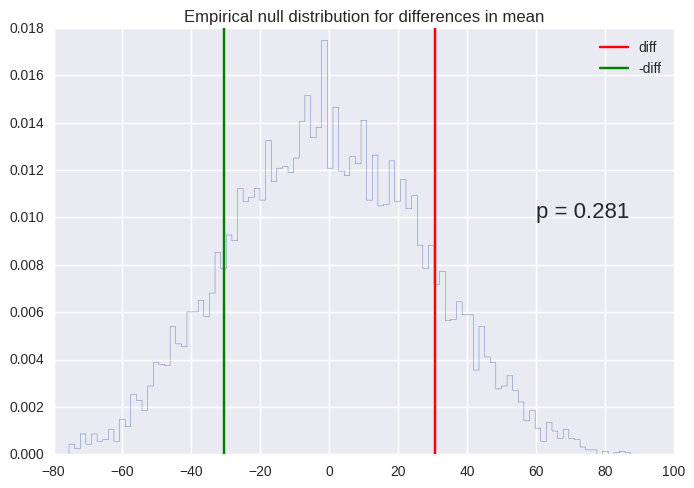

In [5]:
import numpy as np
import numpy.random as npr
import pylab

def permutation_resampling(case, control, num_samples, statistic):
    """Returns p-value that statistic for case is different
    from statistc for control."""

    observed_diff = abs(statistic(case) - statistic(control))
    num_case = len(case)

    combined = np.concatenate([case, control])
    diffs = []
    for i in range(num_samples):
        xs = npr.permutation(combined)
        diff = np.mean(xs[:num_case]) - np.mean(xs[num_case:])
        diffs.append(diff)

    pval = (np.sum(diffs > observed_diff) +
            np.sum(diffs < -observed_diff))/float(num_samples)
    return pval, observed_diff, diffs




# make up some data
case = [94, 38, 23, 197, 99, 16, 141]
control = [52, 10, 40, 104, 51, 27, 146, 30, 46]

# find p-value by permutation resampling
pval, observed_diff, diffs = \
      permutation_resampling(case, control, 10000, np.mean)

# make plots
pylab.title('Empirical null distribution for differences in mean')
pylab.hist(diffs, bins=100, histtype='step', normed=True)
pylab.axvline(observed_diff, c='red', label='diff')
pylab.axvline(-observed_diff, c='green', label='-diff')
pylab.text(60, 0.01, 'p = %.3f' % pval, fontsize=16)
pylab.legend()


## Shapiro Test for Normality

In [21]:
from scipy import stats
np.random.seed (12345678)
x = stats.norm.rvs(loc=5,scale=3, size=1000)
x2= stats.poisson.rvs(loc=5,mu=3, size=1000)
# if 2nd value, the p-value, is >0.05 the we can reject the null hypothesis that the sample ISN'T normally distributed and conclude that it is likely NORMAL
print(stats.shapiro(x))
print(stats.shapiro(x2))


(0.9987979531288147, 0.753572940826416)
(0.9385859966278076, 6.796639362967057e-20)


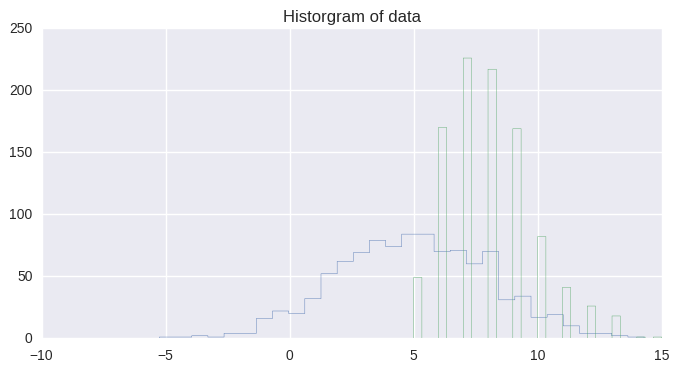

In [22]:
pylab.figure(figsize=(8,4))
pylab.hist(x, 30, histtype='step')
pylab.hist(x2, 30, histtype='step')

pylab.title('Historgram of data')

In [27]:
x3=np.array([462,466,476])
stats.shapiro(x3)


(0.9423069953918457, 0.5367334485054016)

## Integration

### integrate $x^3$ between the limits of 0 and 5; 
$$\int_0^5 x^3 dx $$


In [18]:
from scipy.integrate import quad
result = quad(lambda x: x*x*x, 0, 5)
result


(156.25000000000003, 1.7347234759768075e-12)

## Symbolic Maths - SymPy

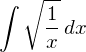

In [1]:
from sympy import *
x, y, z = symbols('x y z')
init_printing()
Integral(sqrt(1/x),x)

### Interpolation


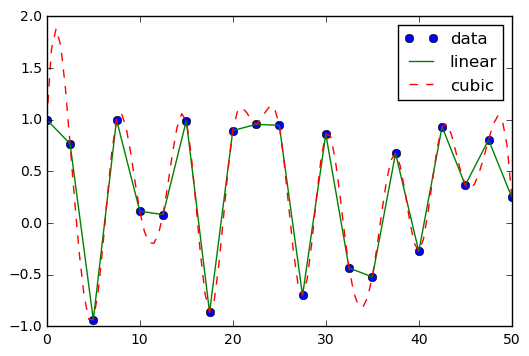

0.11527994954575


In [19]:
from scipy.interpolate import interp1d
x = np.linspace(0, 50, num=21, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y) # linear interpolation
f2 = interp1d(x, y, kind='cubic') # cubic interpolation

xnew = np.linspace(0, 50, num=101, endpoint=True)
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()
print(f2(10))

### Fourier Transform

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


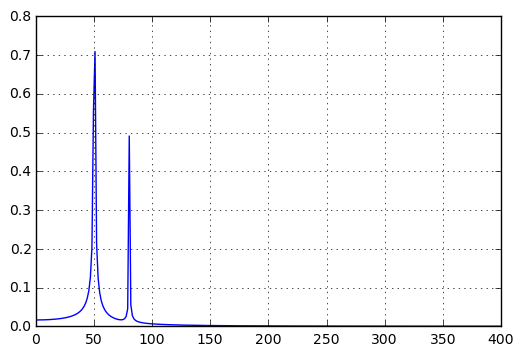

In [20]:
from scipy.fftpack import fft
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N/2]))
plt.grid()
plt.show()

In [ ]:
# pyDOE for design of experiments in python
# R statistics in Jupyter
